<a href="https://colab.research.google.com/github/SuriyaPriya17/image_processing/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics tensorflow keras opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.12/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 81.7ms
image 2/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 42.8ms
Speed: 5.5ms preprocess, 62.3ms inference, 169.4ms postprocess per image at shape (1, 3, 384, 640)


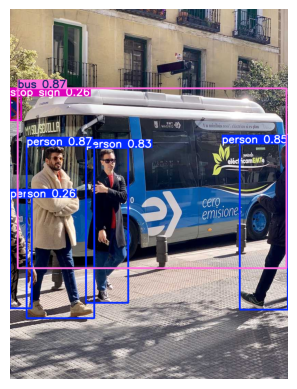

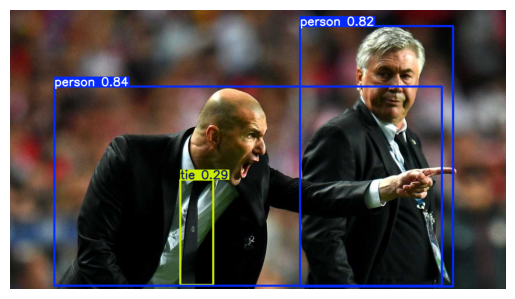

Detected: bus (Confidence: 0.87)
Detected: person (Confidence: 0.87)
Detected: person (Confidence: 0.85)
Detected: person (Confidence: 0.83)
Detected: person (Confidence: 0.26)
Detected: stop sign (Confidence: 0.26)


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (you can use yolov8n/s/m/l/x based on speed vs accuracy)
model = YOLO("yolov8n.pt")  # small and fast model

# Load an image
img_path = "cat.jpg"
img = cv2.imread(img_path)

# Run detection
results = model(img)

# Visualize
for r in results:
    annotated = r.plot()  # Draw bounding boxes
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Print detected classes and confidences
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Detected: {model.names[cls]} (Confidence: {conf:.2f})")


In [ ]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")

# Train on your dataset (COCO-style YAML)
model.train(data="coco128.yaml", epochs=50, imgsz=640, batch=16)